In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pip install geopandas matplotlib descartes

Note: you may need to restart the kernel to use updated packages.


In [3]:
import fiona
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'rw'

In [11]:
import geopandas as gpd

illinois_map = gpd.read_file('tl_2017_17_place.shp')
illinois_map

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,17,37621,02398579,1737621,Iola,Iola village,47,C1,N,N,G4110,A,2525074,0,+38.8340047,-088.6278347,"POLYGON ((-88.63779 38.83065, -88.63766 38.834..."
1,17,28807,02398948,1728807,Gays,Gays village,47,C1,N,N,G4110,A,1053451,0,+39.4581569,-088.4963203,"POLYGON ((-88.50367 39.46202, -88.50340 39.462..."
2,17,56627,02399585,1756627,Orland Hills,Orland Hills village,47,C1,N,N,G4110,A,2965354,19721,+41.5911743,-087.8415395,"MULTIPOLYGON (((-87.85237 41.58674, -87.85231 ..."
3,17,04247,02398053,1704247,Baylis,Baylis village,47,C1,N,N,G4110,A,1213688,0,+39.7294385,-090.9092821,"POLYGON ((-90.91599 39.72893, -90.91591 39.729..."
4,17,26480,02398886,1726480,Florence,Florence village,47,C1,N,N,G4110,A,539809,0,+39.6286917,-090.6106967,"POLYGON ((-90.61410 39.63480, -90.61377 39.634..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,17,80879,02628562,1780879,West Union,West Union CDP,57,U1,N,N,G4210,S,4101219,0,+39.2150049,-087.6657276,"POLYGON ((-87.67986 39.21019, -87.67986 39.214..."
1365,17,80957,02583444,1780957,West York,West York CDP,57,U1,N,N,G4210,S,343786,0,+39.1688409,-087.6730400,"POLYGON ((-87.67559 39.16623, -87.67557 39.169..."
1366,17,81165,02771129,1781165,Whiteash,Whiteash CDP,57,U2,N,N,G4210,S,2267325,65870,+37.7838434,-088.9308227,"POLYGON ((-88.93722 37.78282, -88.93716 37.784..."
1367,17,81295,02628564,1781295,White Heath,White Heath CDP,57,U1,N,N,G4210,S,884168,0,+40.0868112,-088.5116487,"POLYGON ((-88.52104 40.08358, -88.52098 40.083..."


In [13]:
df['GEOID'] = illinois_map['GEOID']

In [15]:
merged_data = illinois_map.merge(df, how='left', on='GEOID')
merged_data

,STATEFP,PLACEFP,PLACENS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,PCICBSA,PCINECTA,...,city_no,race_no,sex_no,STATE_no,citizenship_no,occupation_no,school_no,prisoner_type_no,r,r_count
0,17,37621,02398579,1737621,Iola,Iola village,47,C1,N,N,...,0,0,0,0,0,4,0,0,True,1
1,17,28807,02398948,1728807,Gays,Gays village,47,C1,N,N,...,0,0,0,0,0,0,0,2,True,4
2,17,56627,02399585,1756627,Orland Hills,Orland Hills village,47,C1,N,N,...,0,0,0,0,0,8,0,0,False,0
3,17,04247,02398053,1704247,Baylis,Baylis village,47,C1,N,N,...,0,0,0,0,0,2,0,2,False,0
4,17,26480,02398886,1726480,Florence,Florence village,47,C1,N,N,...,0,0,0,0,0,0,0,3,True,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,17,80879,02628562,1780879,West Union,West Union CDP,57,U1,N,N,...,0,0,0,0,0,2,0,2,False,0
1365,17,80957,02583444,1780957,West York,West York CDP,57,U1,N,N,...,1,0,1,0,0,0,0,0,True,1
1366,17,81165,02771129,1781165,Whiteash,Whiteash CDP,57,U2,N,N,...,0,0,0,0,0,3,0,2,True,2
1367,17,81295,02628564,1781295,White Heath,White Heath CDP,57,U1,N,N,...,0,0,0,0,0,0,0,11,True,1


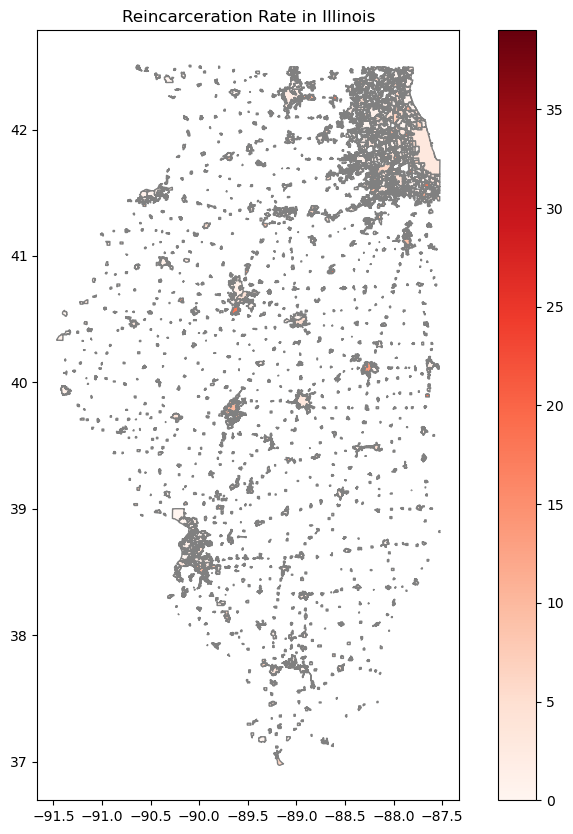

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
merged_data.plot(ax=ax, column='r_count', cmap='Reds', edgecolor='grey', legend=True)
plt.title('Reincarceration Rate in Illinois')
plt.show()

In [9]:
df = pd.read_csv("CLEAN_chm_jail_data.csv")
df[['age_at_arrest', 'age_at_release', 'occupation_no', 'school_no', 'r_count', 'prisoner_type_no']].corr()

,age_at_arrest,age_at_release,occupation_no,school_no,r_count,prisoner_type_no
age_at_arrest,1.000000,0.999865,0.176182,-0.038550,-0.040794,0.035025
age_at_release,0.999865,1.000000,0.175659,-0.038514,-0.040451,0.036022
occupation_no,0.176182,0.175659,1.000000,-0.003866,-0.133611,-0.027338
school_no,-0.038550,-0.038514,-0.003866,1.000000,-0.008835,-0.001849
r_count,-0.040794,-0.040451,-0.133611,-0.008835,1.000000,0.042630
prisoner_type_no,0.035025,0.036022,-0.027338,-0.001849,0.042630,1.000000


In [10]:
df['city_no'].unique()

array([0, 1])

Text(0, 0.5, 'Number of Repeat Offenses')

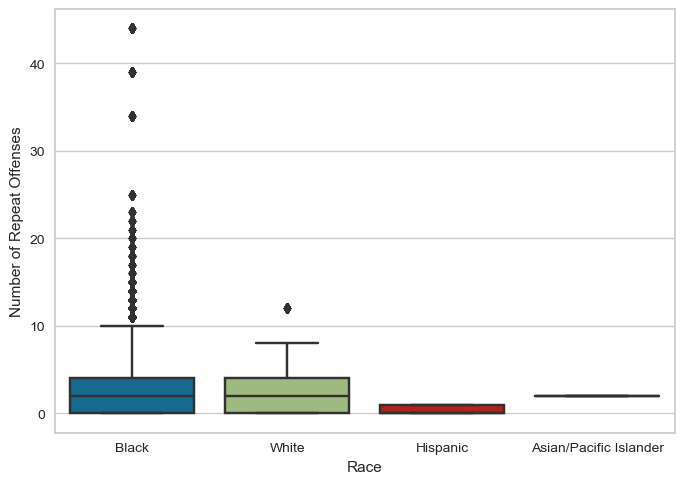

In [32]:
sns.boxplot(x='race', y='r_count', data=df)
plt.xlabel("Race")
plt.ylabel("Number of Repeat Offenses")

The boxplot above shows that black people are most likely to be reincarcerated; black people have the highest number / frequency of reincarcerations.

Text(0, 0.5, 'Number of Repeat Offenses')

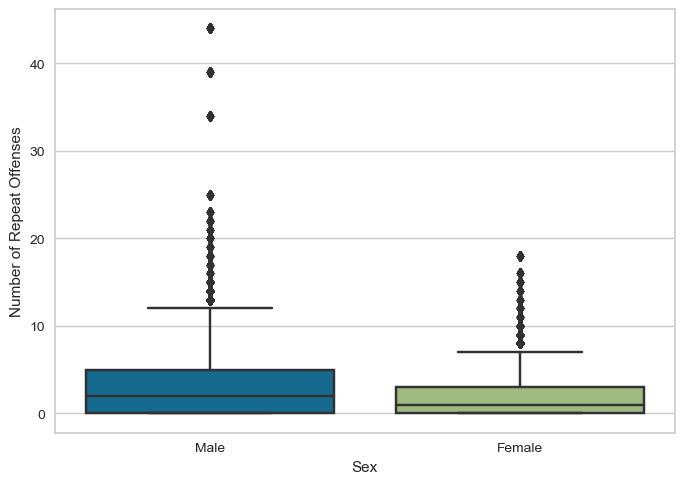

In [31]:
sns.boxplot(x='sex', y='r_count', data=df)
plt.xlabel("Sex")
plt.ylabel("Number of Repeat Offenses")

The above boxplot shows that males tend to be reincarcerated more often than females.

Text(0, 0.5, 'Number of Repeat Offenses')

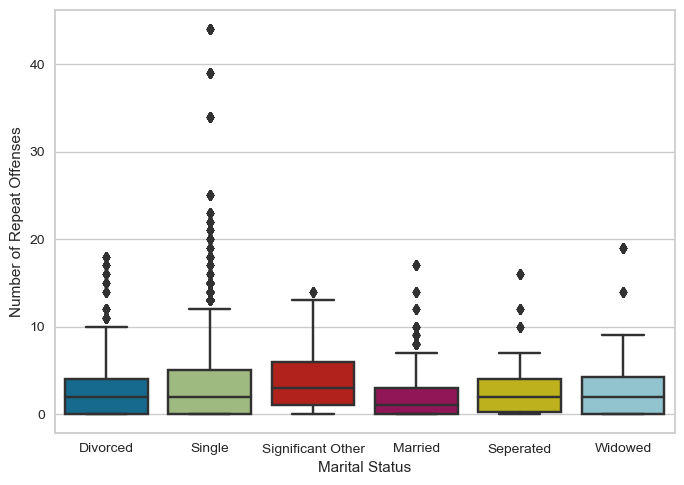

In [30]:
sns.boxplot(x='marital_status', y='r_count', data=df)
plt.xlabel("Marital Status")
plt.ylabel("Number of Repeat Offenses")

Single individuals tend to be reincarcerated more than all other marital statuses.

Text(0, 0.5, 'Number of Repeat Offenses')

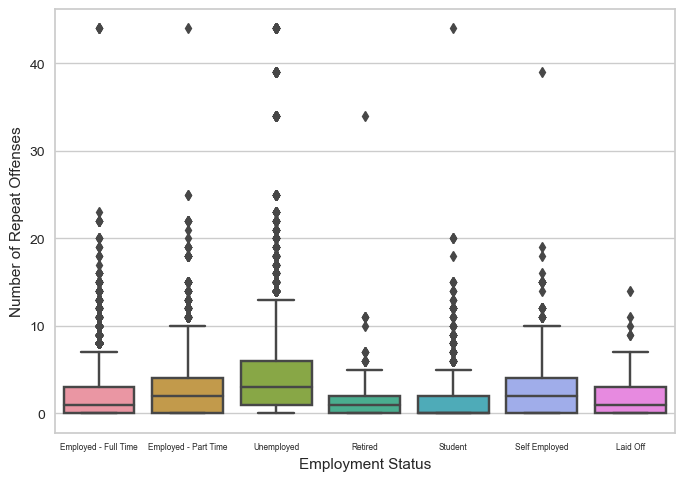

In [29]:
sns.boxplot(x='employment_status', y='r_count', data=df)
xticklabels = plt.xticks()[1]


plt.setp(xticklabels, fontsize=6) 
plt.xlabel("Employment Status")
plt.ylabel("Number of Repeat Offenses")

Employment is not the best indicator for reincarceration, but unemployed individuals tend to be reincarcerated the most out of other employment statuses.

Text(0, 0.5, 'Number of Repeat Offenses')

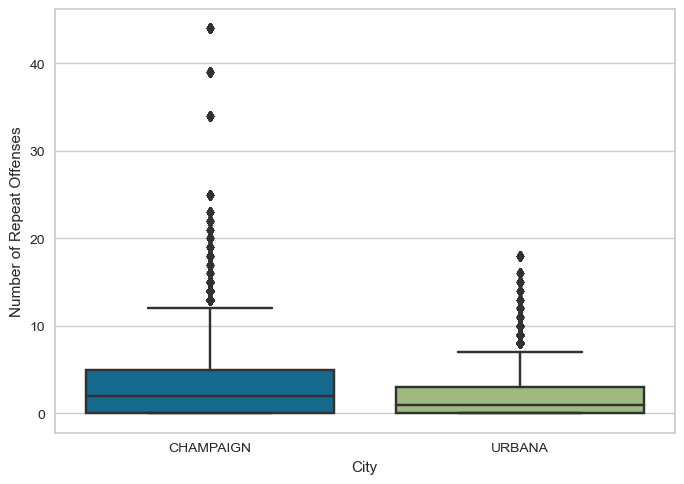

In [33]:
sns.boxplot(x='city', y='r_count', data=df)
plt.xlabel("City")
plt.ylabel("Number of Repeat Offenses")

When comparing Champaign to Urbana, the city of Champaign has more repeat offenders. 